In [3]:
# Component Failure

In [4]:
# Generic problem statement related to automotive , Manufacturing ,Maintenance .

In [5]:
# problem statement:- 
#     (1)Analysis of Reason of Failure
#     (2)Build a model to predict failure YES/NO.
#     (3)Build a model to predict Failure type

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [7]:
original_data=pd.read_csv('component_failure_prediction.csv')
df=original_data.copy()
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [8]:
df.drop(['UDI','Product ID'],inplace=True,axis=1)

In [9]:
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure


In [10]:
df['Target'].value_counts(normalize=True)

0    0.9661
1    0.0339
Name: Target, dtype: float64

In [11]:
df['Failure Type'].value_counts(normalize=True)

No Failure                  0.9652
Heat Dissipation Failure    0.0112
Power Failure               0.0095
Overstrain Failure          0.0078
Tool Wear Failure           0.0045
Random Failures             0.0018
Name: Failure Type, dtype: float64

In [12]:
# lets do some evaluation on the Target and Failure type.
# basically we want to check the contradictory between the target variables.

In [13]:
df_failure=df[df['Target']==1]

In [14]:
df_failure.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
50,L,298.9,309.1,2861,4.6,143,1,Power Failure
69,L,298.9,309.0,1410,65.7,191,1,Power Failure
77,L,298.8,308.9,1455,41.3,208,1,Tool Wear Failure
160,L,298.4,308.2,1282,60.7,216,1,Overstrain Failure
161,L,298.3,308.1,1412,52.3,218,1,Overstrain Failure


In [15]:
df_failure.value_counts().head()

Type  Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  Failure Type            
H     296.6                307.7                    1386                    62.3         100              1       Power Failure               1
L     303.1                311.3                    1336                    52.6         172              1       Heat Dissipation Failure    1
      303.3                311.4                    1497                    46.0         234              1       Tool Wear Failure           1
                           311.3                    1350                    48.1         32               1       Heat Dissipation Failure    1
      303.2                311.4                    1351                    53.8         8                1       Heat Dissipation Failure    1
dtype: int64

In [16]:
#lets identify those observation where the contradictory exist between the Target variable
# bascially we want to check the contradictory between the target variables

In [17]:
df_failure=df[df['Target']==1]

In [18]:
df_failure.head(20)

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
50,L,298.9,309.1,2861,4.6,143,1,Power Failure
69,L,298.9,309.0,1410,65.7,191,1,Power Failure
77,L,298.8,308.9,1455,41.3,208,1,Tool Wear Failure
160,L,298.4,308.2,1282,60.7,216,1,Overstrain Failure
161,L,298.3,308.1,1412,52.3,218,1,Overstrain Failure
168,L,298.4,308.3,1433,62.3,20,1,Power Failure
194,M,298.2,308.5,2678,10.7,86,1,Power Failure
207,M,298.4,308.7,1421,60.7,119,1,Power Failure
242,L,298.0,308.2,1348,58.8,202,1,Overstrain Failure
248,L,298.0,308.3,1362,56.8,216,1,Overstrain Failure


In [19]:
df_failure['Failure Type'].value_counts

<bound method IndexOpsMixin.value_counts of 50           Power Failure
69           Power Failure
77       Tool Wear Failure
160     Overstrain Failure
161     Overstrain Failure
               ...        
9758     Tool Wear Failure
9764         Power Failure
9822    Overstrain Failure
9830    Overstrain Failure
9974         Power Failure
Name: Failure Type, Length: 339, dtype: object>

In [20]:
#lets identify those observation where the contradictory exist between the Target variable

In [21]:
df_failure[df_failure['Failure Type']=='No Failure']

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
1437,H,298.8,309.9,1439,45.2,40,1,No Failure
2749,M,299.7,309.2,1685,28.9,179,1,No Failure
4044,M,301.9,310.9,1419,47.7,20,1,No Failure
4684,M,303.6,311.8,1421,44.8,101,1,No Failure
5536,M,302.3,311.8,1363,54.0,119,1,No Failure
5941,L,300.6,310.7,1438,48.5,78,1,No Failure
6478,L,300.5,309.8,1663,29.1,145,1,No Failure
8506,L,298.4,309.6,1710,27.3,163,1,No Failure
9015,L,297.2,308.1,1431,49.7,210,1,No Failure


In [22]:
df.shape

(10000, 8)

In [23]:
drop_no_failure=df_failure[df_failure['Failure Type']=='No Failure'].index

In [24]:
drop_no_failure

Int64Index([1437, 2749, 4044, 4684, 5536, 5941, 6478, 8506, 9015], dtype='int64')

In [25]:
df1=df.drop(drop_no_failure,axis=0)

In [26]:
df1.shape

(9991, 8)

In [27]:
df_no_failure=df1[df1['Target']==0]

In [28]:
df_no_failure['Failure Type'].value_counts()

No Failure         9643
Random Failures      18
Name: Failure Type, dtype: int64

In [29]:
df_no_failure.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure


In [30]:
df_no_failure[df_no_failure['Failure Type']=='Random Failures']

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
1221,M,297.0,308.3,1399,46.4,132,0,Random Failures
1302,L,298.6,309.8,1505,45.7,144,0,Random Failures
1748,H,298.4,307.7,1626,31.1,166,0,Random Failures
2072,L,299.6,309.5,1570,35.5,189,0,Random Failures
2559,L,299.3,309.0,1447,50.4,140,0,Random Failures
3065,M,300.1,309.2,1687,27.7,95,0,Random Failures
3452,H,301.6,310.5,1602,32.3,2,0,Random Failures
5471,L,302.7,312.3,1346,61.2,170,0,Random Failures
5489,L,302.6,312.1,1499,35.0,215,0,Random Failures
5495,H,302.9,312.5,1357,55.0,12,0,Random Failures


In [31]:
drop_random_failure=df_no_failure[df_no_failure['Failure Type']=='Random Failures'].index

In [32]:
drop_random_failure

Int64Index([1221, 1302, 1748, 2072, 2559, 3065, 3452, 5471, 5489, 5495, 5509,
            5553, 5639, 6091, 6913, 6960, 7488, 7868],
           dtype='int64')

In [33]:
df2=df1.drop(drop_random_failure,axis=0)

In [34]:
df2.shape

(9973, 8)

In [35]:
# do some visualization (Exploratory Data Analysis)

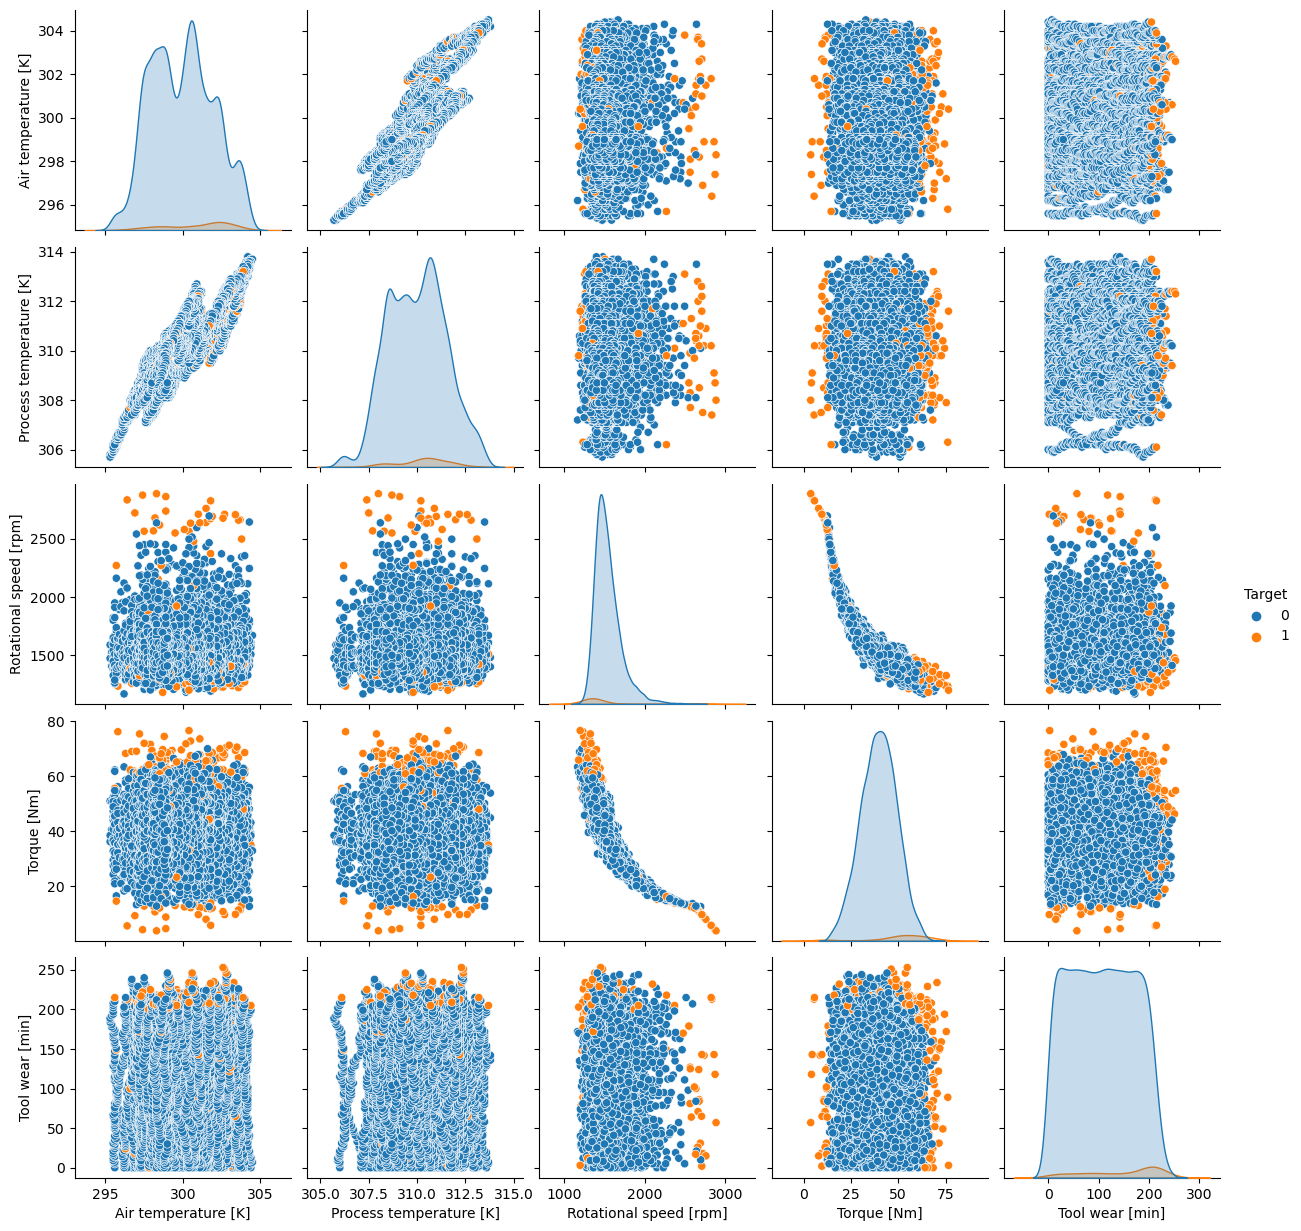

In [36]:
sns.pairplot(df2,hue='Target')

In [37]:
# please do plot some other graphs , line plots,scatterplot,count plot
# must write your opinion -- interpretation
# please plot a dedicated graph of for Torque and rotational speed

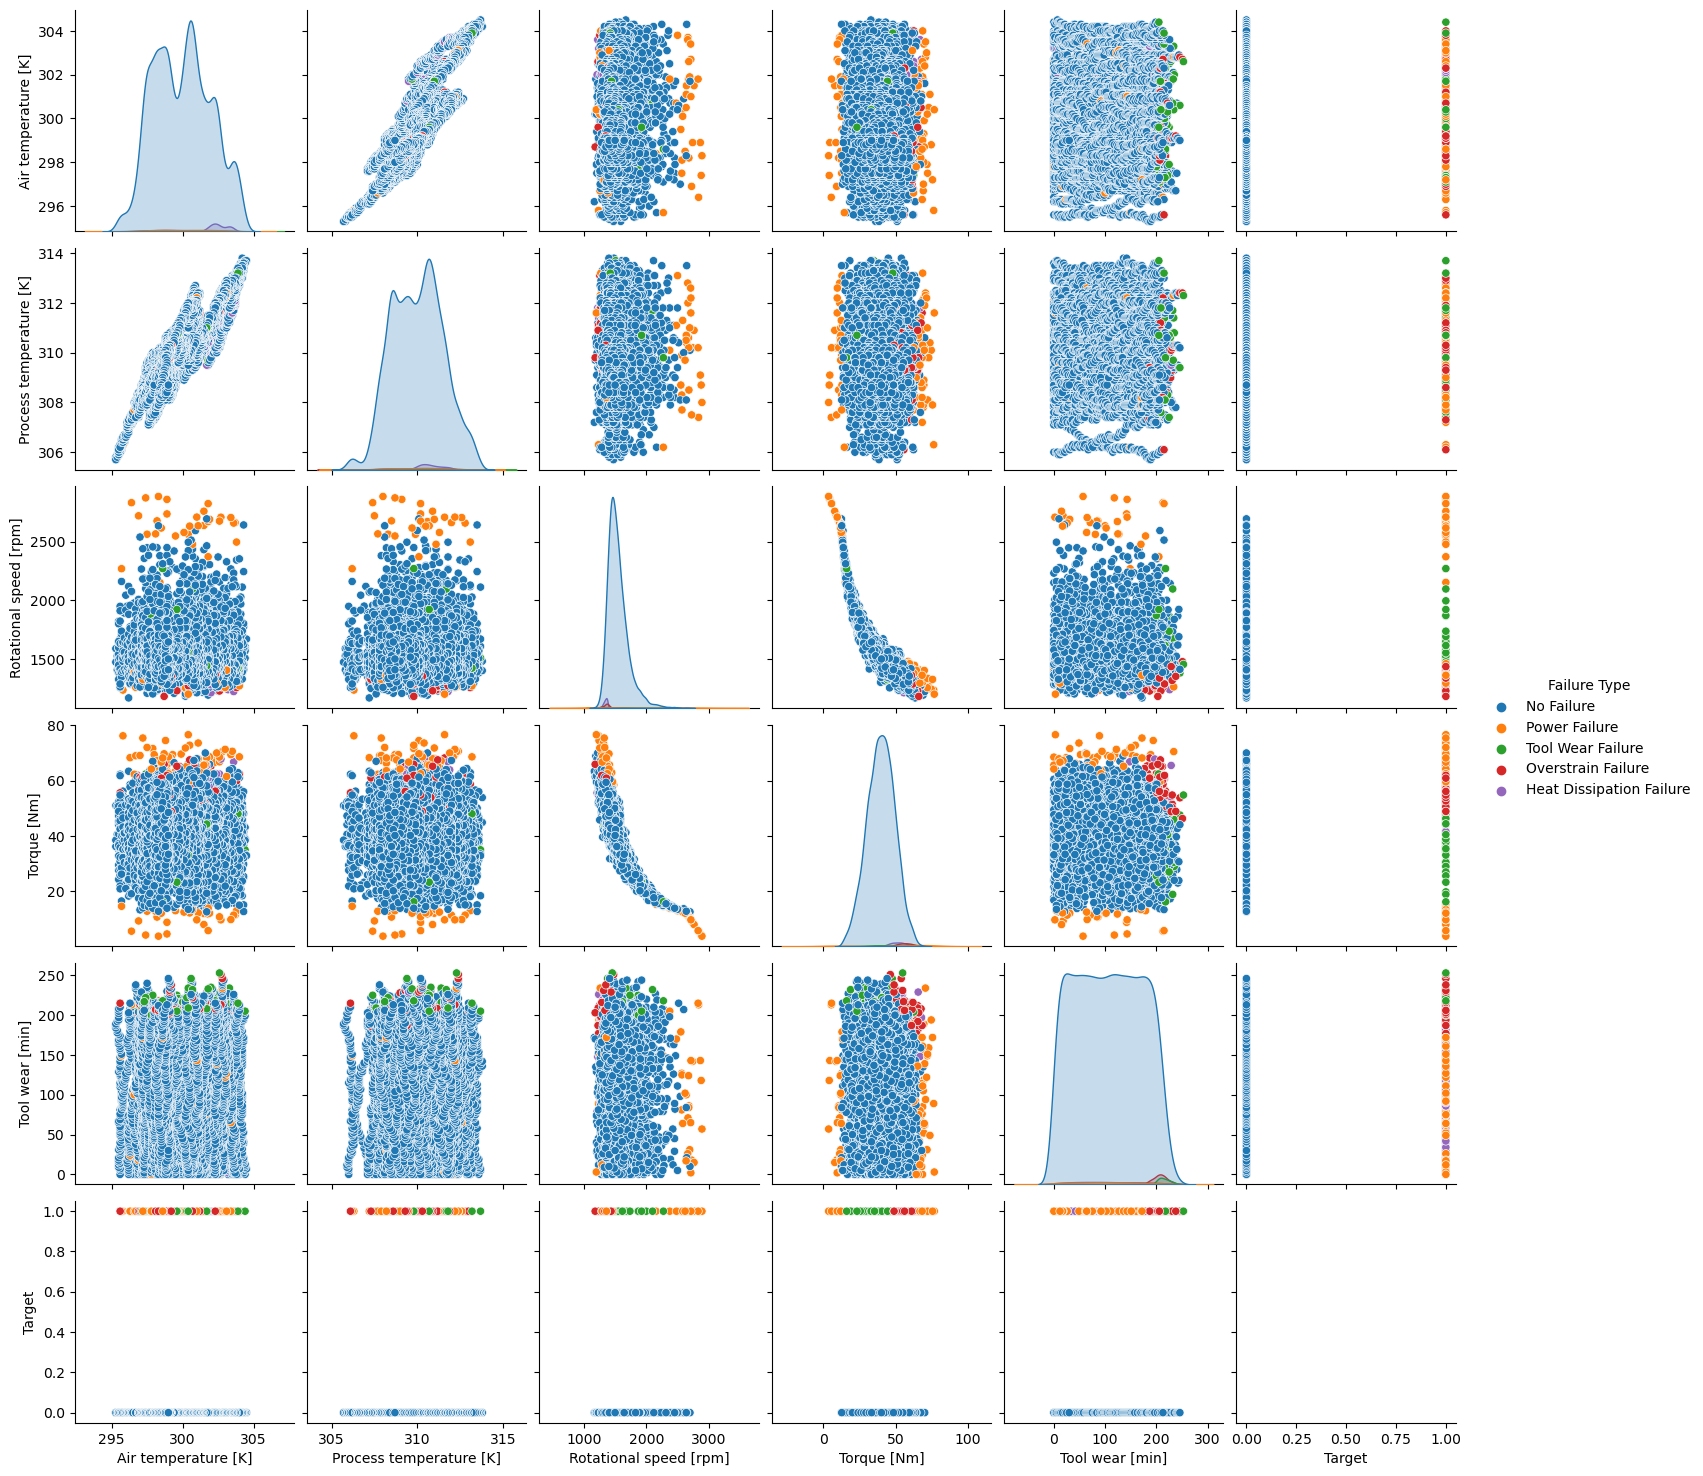

In [38]:
sns.pairplot(df2,hue='Failure Type')

<Axes: xlabel='Rotational speed [rpm]', ylabel='Torque [Nm]'>

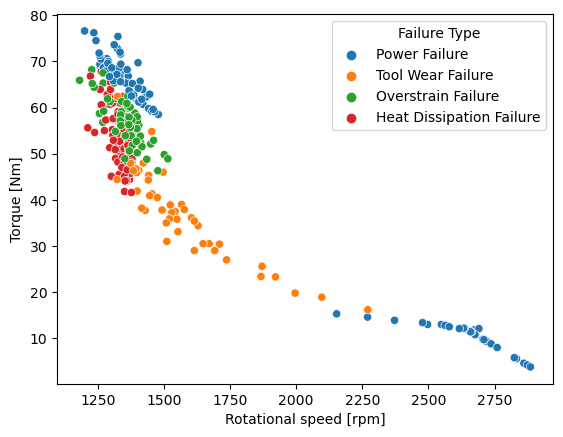

In [39]:
# scatter plot
sns.scatterplot(data=df2[df2['Target']==1],x='Rotational speed [rpm]',y='Torque [Nm]',hue='Failure Type')

In [40]:
#please write the interpretation about the graph.

''' the graph is about the different types of failure of the Components due to torque and Rotational Speed. '''

' the graph is about the different types of failure of the Components due to torque and Rotational Speed. '

In [41]:
# correlation between the variables
corr_matrix=df2.corr() #by default pearson

In [42]:
corr_matrix

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
Air temperature [K],1.000000,0.876068,0.023332,-0.014553,0.014370,0.083066
Process temperature [K],0.876068,1.000000,0.020200,-0.015275,0.013970,0.035997
Rotational speed [rpm],0.023332,0.020200,1.000000,-0.875069,-0.000110,-0.044042
Torque [Nm],-0.014553,-0.015275,-0.875069,1.000000,-0.002552,0.193420
Tool wear [min],0.014370,0.013970,-0.000110,-0.002552,1.000000,0.106337
Target,0.083066,0.035997,-0.044042,0.193420,0.106337,1.000000


<Axes: >

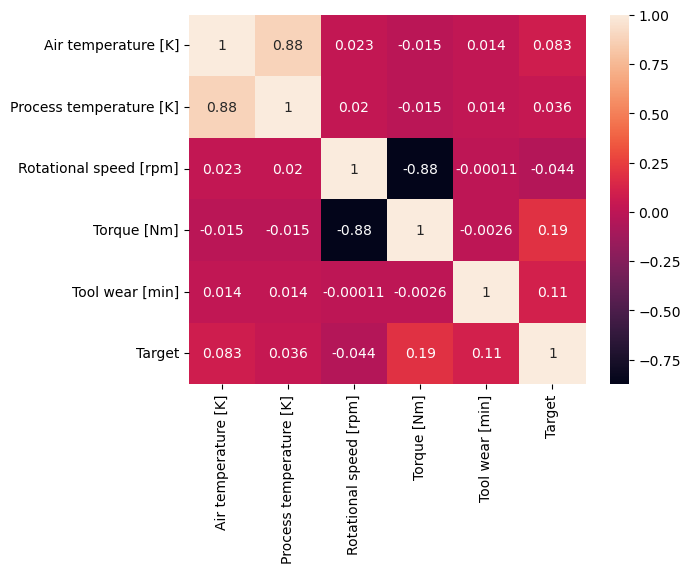

In [43]:
sns.heatmap(corr_matrix,annot=True)

In [44]:
# we have 3 category of components -- L,M,H
df2['Type'].value_counts()

L    5984
M    2991
H     998
Name: Type, dtype: int64

In [47]:
# just evaluate the failure percentage of L,M,H type components
Low_price=df2[df2['Type']=='L']
Low_price.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure
6,L,298.1,308.6,1558,42.4,14,0,No Failure


In [48]:
Medium_price=df2[df2['Type']=='M']
Medium_price.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
5,M,298.1,308.6,1425,41.9,11,0,No Failure
8,M,298.3,308.7,1667,28.6,18,0,No Failure
9,M,298.5,309.0,1741,28.0,21,0,No Failure
12,M,298.6,309.1,1339,51.1,34,0,No Failure


In [50]:
High_price=df2[df2['Type']=='H']
High_price.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
10,H,298.4,308.9,1782,23.9,24,0,No Failure
11,H,298.6,309.1,1423,44.3,29,0,No Failure
18,H,298.8,309.2,1306,54.5,50,0,No Failure
20,H,298.9,309.3,1375,42.7,58,0,No Failure
27,H,299.1,309.4,1811,24.6,77,0,No Failure


In [52]:
Low_price['Target'].value_counts(normalize='True')

0    0.961397
1    0.038603
Name: Target, dtype: float64

In [53]:
Medium_price['Target'].value_counts(normalize='True')

0    0.973587
1    0.026413
Name: Target, dtype: float64

In [54]:
High_price['Target'].value_counts(normalize='True')

0    0.97996
1    0.02004
Name: Target, dtype: float64

In [ ]:
# please write your interpretation on the above L,M,H evaluation with respect to component failure
' the component failure in low price category is more compared to others'

In [56]:
# lets do some outliers

<Axes: xlabel='Torque [Nm]'>

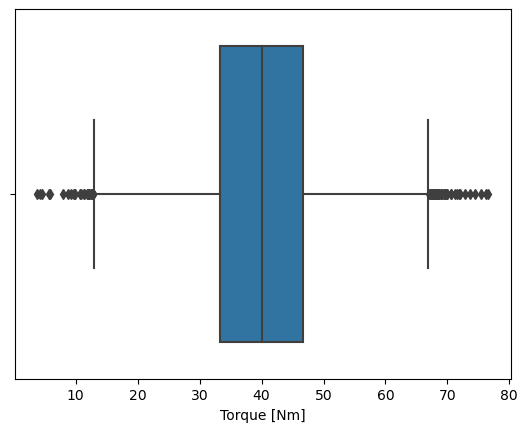

In [57]:
sns.boxplot(data=df2,x='Torque [Nm]')

<Axes: xlabel='Rotational speed [rpm]'>

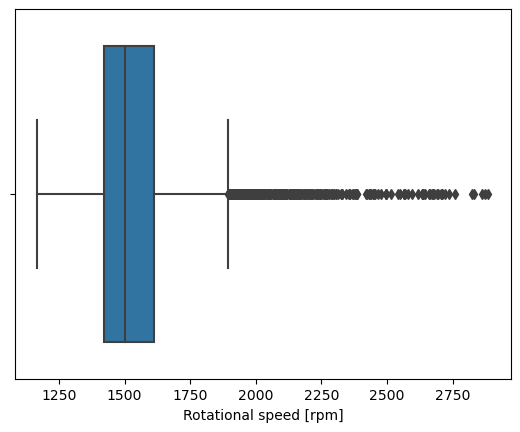

In [60]:
sns.boxplot(data=df2,x='Rotational speed [rpm]')

In [61]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9973 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     9973 non-null   object 
 1   Air temperature [K]      9973 non-null   float64
 2   Process temperature [K]  9973 non-null   float64
 3   Rotational speed [rpm]   9973 non-null   int64  
 4   Torque [Nm]              9973 non-null   float64
 5   Tool wear [min]          9973 non-null   int64  
 6   Target                   9973 non-null   int64  
 7   Failure Type             9973 non-null   object 
dtypes: float64(3), int64(3), object(2)
memory usage: 701.2+ KB


In [62]:
df2['Type'].value_counts()

L    5984
M    2991
H     998
Name: Type, dtype: int64

In [63]:
# mapping approach to convert categorical to numeric
df2['Type']=df2['Type'].map({'L':0,'M':1,'H':2})

In [65]:
df2['Failure Type'].value_counts()

No Failure                  9643
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Name: Failure Type, dtype: int64

In [66]:
df2["Failure Type"]=df2["Failure Type"].map({'No Failure':0,'Heat Dissipation Failure':1,
                                            'Power Failure':2,'Overstrain Failure':3,
                                            'Tool Wear Failure':4})

In [67]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9973 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     9973 non-null   int64  
 1   Air temperature [K]      9973 non-null   float64
 2   Process temperature [K]  9973 non-null   float64
 3   Rotational speed [rpm]   9973 non-null   int64  
 4   Torque [Nm]              9973 non-null   float64
 5   Tool wear [min]          9973 non-null   int64  
 6   Target                   9973 non-null   int64  
 7   Failure Type             9973 non-null   int64  
dtypes: float64(3), int64(5)
memory usage: 701.2 KB


<Axes: >

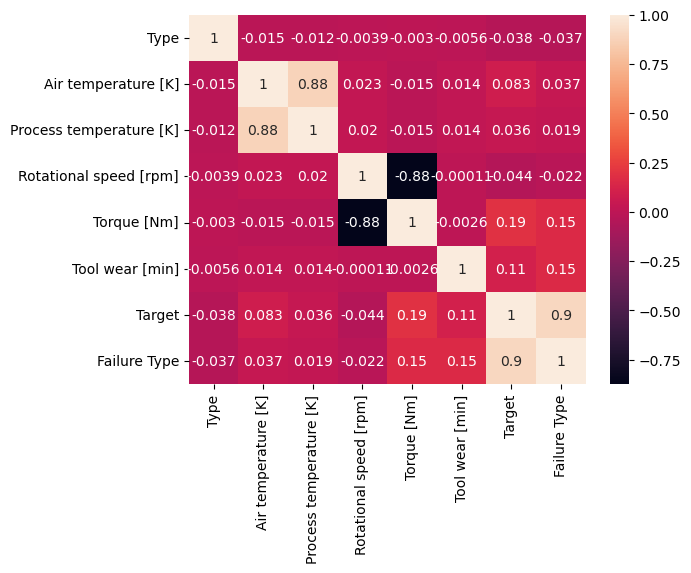

In [69]:
sns.heatmap(df2.corr(),annot=True)

In [70]:
# model for Target - binary classification 

X=df2.drop(['Target','Failure Type'],axis=1)

In [71]:
Y=df2['Target']

In [74]:
from sklearn.model_selection import train_test_split,StratifiedShuffleSplit,cross_val_score,cross_validate

In [75]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.8,stratify=Y,random_state=100)

In [79]:
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,GradientBoostingClassifier,AdaBoostClassifier

In [80]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [82]:
rf=RandomForestClassifier(class_weight='balanced')
bg=BaggingClassifier()
gb=GradientBoostingClassifier()
ab=AdaBoostClassifier()
dt=DecisionTreeClassifier(class_weight='balanced')
log=LogisticRegression(class_weight='balanced')

In [83]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [85]:
from sklearn.preprocessing import MinMaxScaler,RobustScaler,StandardScaler

In [86]:
scaler=MinMaxScaler(feature_range=(-1,1))

In [87]:
X_train_scaled=scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)

In [88]:
X_test_scaled=scaler.transform(X_test)

In [89]:
X_test_scaled

array([[-1.        ,  0.2826087 ,  0.25925926, -0.73923166,  0.34065934,
        -0.81300813],
       [ 0.        ,  0.39130435,  0.35802469, -0.71478463,  0.06593407,
        -0.35772358],
       [ 0.        ,  0.52173913,  0.48148148, -0.62048894, -0.08516484,
        -0.07317073],
       ...,
       [ 0.        ,  0.52173913,  0.48148148, -0.59371362, -0.07142857,
         0.00813008],
       [ 0.        , -0.54347826, -0.28395062, -0.43073341, -0.19505495,
         0.26829268],
       [-1.        ,  0.17391304,  0.01234568, -0.72293364,  0.22527473,
         0.22764228]])

In [90]:
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)

In [91]:
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [93]:
for model in [rf,bg,gb,ab,dt,log]:
    print('*****'*3)
    print('performance of model:-',model)
    print('*****'*3)
    cv=StratifiedShuffleSplit(n_splits=10,test_size=0.20,random_state=100)
    scoring=['f1_macro','precision_macro','recall_macro']
    cross_val_scores=cross_validate(model,X,Y,scoring=scoring,cv=cv)
    
    f1_test_cv=cross_val_scores['test_f1_macro']
    precision_test_cv=cross_val_scores['test_precision_macro'].mean()
    recall_test_cv=cross_val_scores['test_recall_macro']
    
    print('f1 test score',f1_test_cv)
    print('precision_test score',precision_test_cv)
    print('recall_test score',recall_test_cv)

***************
performance of model:- RandomForestClassifier(class_weight='balanced')
***************
f1 test score [0.79396008 0.86911903 0.8222328  0.81170166 0.8255949  0.80511568
 0.79801874 0.83556091 0.80191655 0.82229106]
precision_test score 0.9538090059744275
recall_test score [0.71917857 0.80982846 0.7494816  0.73458928 0.75679815 0.73407088
 0.72649512 0.76463311 0.73381168 0.75653895]
***************
performance of model:- BaggingClassifier()
***************
f1 test score [0.83194177 0.87358101 0.88830749 0.85724712 0.89345415 0.86911903
 0.86121739 0.91493969 0.87017111 0.87112403]
precision_test score 0.9427081793986746
recall_test score [0.77143126 0.82446157 0.85424619 0.79467694 0.84744804 0.80982846
 0.81636741 0.86337716 0.82420237 0.83857628]
***************
performance of model:- GradientBoostingClassifier()
***************
f1 test score [0.8410731  0.87017111 0.85977038 0.82882883 0.85883392 0.83524571
 0.81273512 0.84972643 0.88807854 0.90012182]
precision_test 

In [94]:
for model in [rf,bg,gb,ab,dt,log]:
    print('*****'*3)
    print('perfomance of model:-', model)
    print('*****'*3)
    #cv=StratifiedShuffleSplit(n_splits=10,test_size=0.20,random_state=100)
    scoring=['f1_macro','precision_macro','recall_macro']
    cross_val_scores=cross_validate(model,X,Y,scoring=scoring,cv=10)
    
    f1_test_cv=cross_val_scores['test_f1_macro']
    precision_test_cv=cross_val_scores['test_precision_macro'].mean()
    recall_test_cv=cross_val_scores['test_recall_macro']
    
    print('f1 test score',f1_test_cv)
    print('precision_test score',precision_test_cv)
    print('recall_test score',recall_test_cv)

***************
perfomance of model:- RandomForestClassifier(class_weight='balanced')
***************
f1 test score [0.76128481 0.79299805 0.73855003 0.79062619 0.70406147 0.83353369
 0.59463571 0.67033807 0.68872154 0.75522275]
precision_test score 0.89543838373047
recall_test score [0.68181818 0.71212121 0.66614853 0.73983088 0.68918961 0.81403244
 0.55956872 0.61913743 0.62121212 0.68129951]
***************
perfomance of model:- BaggingClassifier()
***************
f1 test score [0.87846939 0.79063203 0.81586537 0.7923086  0.75890177 0.90864944
 0.7224863  0.78279727 0.82895866 0.84772814]
precision_test score 0.8863305858889488
recall_test score [0.81766368 0.73983357 0.75602135 0.75394505 0.84703885 0.92061172
 0.66459198 0.72519804 0.75705709 0.78684144]
***************
perfomance of model:- GradientBoostingClassifier()
***************
f1 test score [0.89716641 0.84649349 0.82229345 0.64785605 0.70932272 0.83584875
 0.74846861 0.79789547 0.80883614 0.84107084]
precision_test score

In [95]:
for model in [rf,bg,gb,ab,dt,log]:
    print('*******'*3)
    print('performance of model:-',model)
    print('*******'*3)
    abc=model.fit(X_train_scaled,Y_train)
    y_pred=abc.predict(X_test_scaled)
    ac=accuracy_score(Y_test,y_pred)
    cr=classification_report(Y_test,y_pred)
    cm=confusion_matrix(Y_test,y_pred)
    print('accuracy_score \n',ac)
    print('calssification report \n',cr)
    print('confusion matrix \n',cm)

*********************
performance of model:- RandomForestClassifier(class_weight='balanced')
*********************
accuracy_score 
 0.9789473684210527
calssification report 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1929
           1       0.88      0.42      0.57        66

    accuracy                           0.98      1995
   macro avg       0.93      0.71      0.78      1995
weighted avg       0.98      0.98      0.98      1995

confusion matrix 
 [[1925    4]
 [  38   28]]
*********************
performance of model:- BaggingClassifier()
*********************
accuracy_score 
 0.9854636591478697
calssification report 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1929
           1       0.93      0.61      0.73        66

    accuracy                           0.99      1995
   macro avg       0.96      0.80      0.86      1995
weighted avg       0.98      0.99

In [96]:
Y1=df2['Failure Type']

In [101]:
for model in [rf,bg,gb,ab,dt,log]:
    print('******'*3)
    print('performance of model:-',model)
    print('******'*3)
    cv=StratifiedShuffleSplit(n_splits=10,test_size=0.20,random_state=100)
    scoring=['f1_macro','precision_macro','recall_macro']
    cross_val_scores=cross_validate(model,X,Y1,scoring=scoring,cv=cv)
    
    f1_test_cv=cross_val_scores['test_f1_macro']
    precision_test_cv=cross_val_scores['test_precision_macro'].mean()
    recall_test_cv=cross_val_scores['test_recall_macro']
    
    print('f1 test score',f1_test_cv)
    print('precision_test score',precision_test_cv)
    print('recall_test score',recall_test_cv)
        

******************
performance of model:- RandomForestClassifier(class_weight='balanced')
******************
f1 test score [0.59979994 0.58948608 0.56059586 0.61166353 0.60311874 0.60887433
 0.60340412 0.63479719 0.63160748 0.58895607]
precision_test score 0.7385104389569607
recall_test score [0.51508771 0.51063393 0.48440589 0.52872407 0.52259566 0.53189393
 0.54369216 0.56341307 0.57620011 0.51918657]
******************
performance of model:- BaggingClassifier()
******************
f1 test score [0.62548042 0.65897251 0.67323776 0.70230665 0.65344194 0.66806663
 0.6761412  0.73139221 0.65401139 0.62653104]
precision_test score 0.726397195011562
recall_test score [0.57406294 0.61512352 0.64685002 0.63600478 0.61242819 0.62690188
 0.66068174 0.71230187 0.64239624 0.60395524]
******************
performance of model:- GradientBoostingClassifier()
******************
f1 test score [0.67548785 0.69155936 0.67863871 0.6860955  0.71314818 0.66905997
 0.65638743 0.72919725 0.73767281 0.66750197

In [98]:
X_train1,X_test1,Y_train1,Y_test1=train_test_split(X,Y1,test_size=0.20,stratify=Y1,random_state=60)

In [99]:
log.fit(X_train1,Y_train1)

LogisticRegression(class_weight='balanced')

In [100]:
y_predict=log.predict(X_test1)

In [102]:
print(classification_report(Y_test1,y_predict))

              precision    recall  f1-score   support

           0       1.00      0.79      0.88      1929
           1       0.09      0.95      0.17        22
           2       0.24      1.00      0.39        19
           3       0.23      0.81      0.36        16
           4       0.06      0.78      0.11         9

    accuracy                           0.79      1995
   macro avg       0.33      0.87      0.38      1995
weighted avg       0.97      0.79      0.86      1995



In [104]:
rf.fit(X_train1,Y_train1)

RandomForestClassifier(class_weight='balanced')

In [105]:
y_predict=rf.predict(X_test1)

In [106]:
print(classification_report(Y_test1,y_predict))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1929
           1       0.79      0.50      0.61        22
           2       1.00      0.63      0.77        19
           3       0.90      0.56      0.69        16
           4       0.00      0.00      0.00         9

    accuracy                           0.98      1995
   macro avg       0.73      0.54      0.61      1995
weighted avg       0.98      0.98      0.98      1995

